<a href="https://colab.research.google.com/github/vdvran/ICU/blob/master/ICU_Mortality_preprocessing_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ICU Mortality Prediction Preproccesing

**NO utilizar mayúsculas** en nombres de variables porfa, gracias ~Ana

In [0]:
# Import libraries
import numpy as np
import matplotlib
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
data = pd.read_csv("/content/drive/My Drive/PROCESADO MASIVO/training_v2.csv")

# Content

**1. General info**

    a) df visualisation (ICU Mortality Prediction Visualization Notebook)
  
    b)  drop variables with a lot of missing values (ICU Mortality Prediction Preprocessing Notebook)
  
  
**2. Remove outliers** (ICU Mortality Prediction Preprocessing Notebook)


**3. Replace missing values** (ICU Mortality Prediction Preprocessing Notebook)


**4. One Hot Encoding** (ICU Mortality Prediction Preprocessing Notebook)


**5. Normalisation** (ICU Mortality Prediction Classification Notebook)

**6. Feature Selection** (ICU Mortality Prediction Classification Notebook)
 
 **7. Umbalanced** (ICU Mortality Prediction Classification Notebook)
 
 **8. Classification** (ICU Mortality Prediction Classification Notebook)


-----

# General Info

In [0]:
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,...,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [0]:
print('nº of variables : ', data.shape[1],'\nnº of patients: ', data.shape[0])

nº of variables :  186 
nº of patients:  91713


***Remove variables with a lot of missing values***



In [0]:
threshold = len(data) * 0.60
df_thresh=data.dropna(axis=1, thresh=threshold)
df_thresh.shape

(91713, 112)

In [0]:
print(df_thresh.shape)
display(df_thresh.nunique())

(91713, 112)


encounter_id                   91713
patient_id                     91713
hospital_id                      147
hospital_death                     2
age                               74
                               ...  
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Length: 112, dtype: int64

In [0]:
df_thresh.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id'], axis='columns', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
print('nº of variables : ', df_thresh.shape[1],'\nnº of patients: ', df_thresh.shape[0])

nº of variables :  108 
nº of patients:  91713


*   **df_thresh** = df con variables con menos missing values
*   **data** = df original

-----

# Outliers or errors

**HEIGHT**:altura

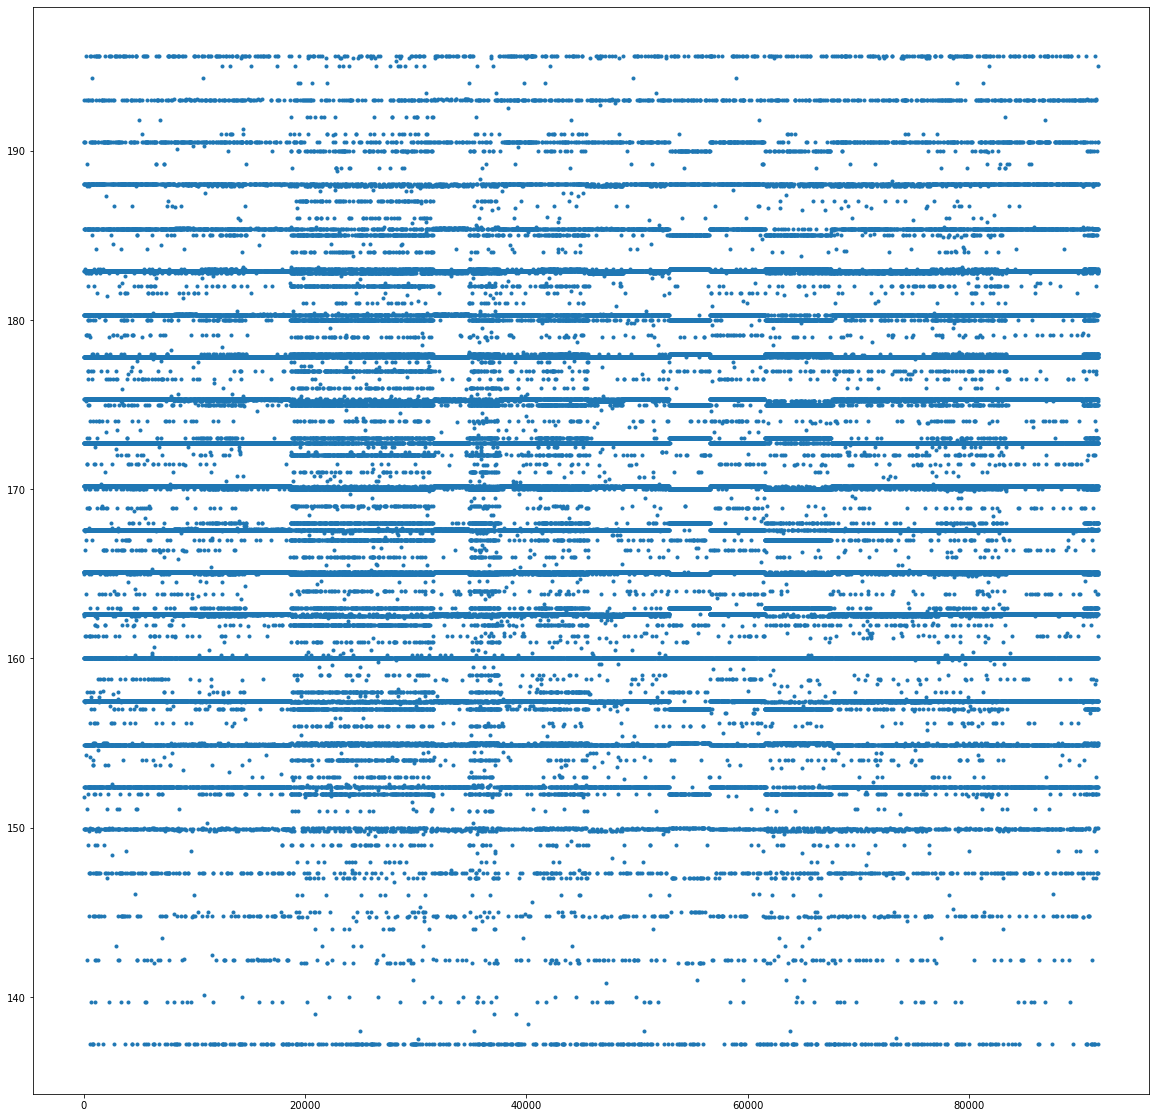

In [0]:
plt.figure(figsize=(20,20))
plt.plot(data['height'],'.')
plt.show()

In [0]:
bajitos=data[data.height<145]

In [0]:
y = bajitos.age
x = bajitos.height

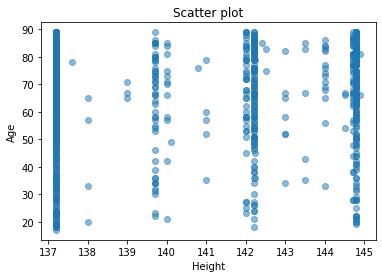

In [0]:
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Height')
plt.ylabel('Age')
plt.show()

In [0]:
indx=0
for i in data.height:
    if i<140:
        df_thresh.height[indx]=140
    indx=indx+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
min(df_thresh.height)

140.0

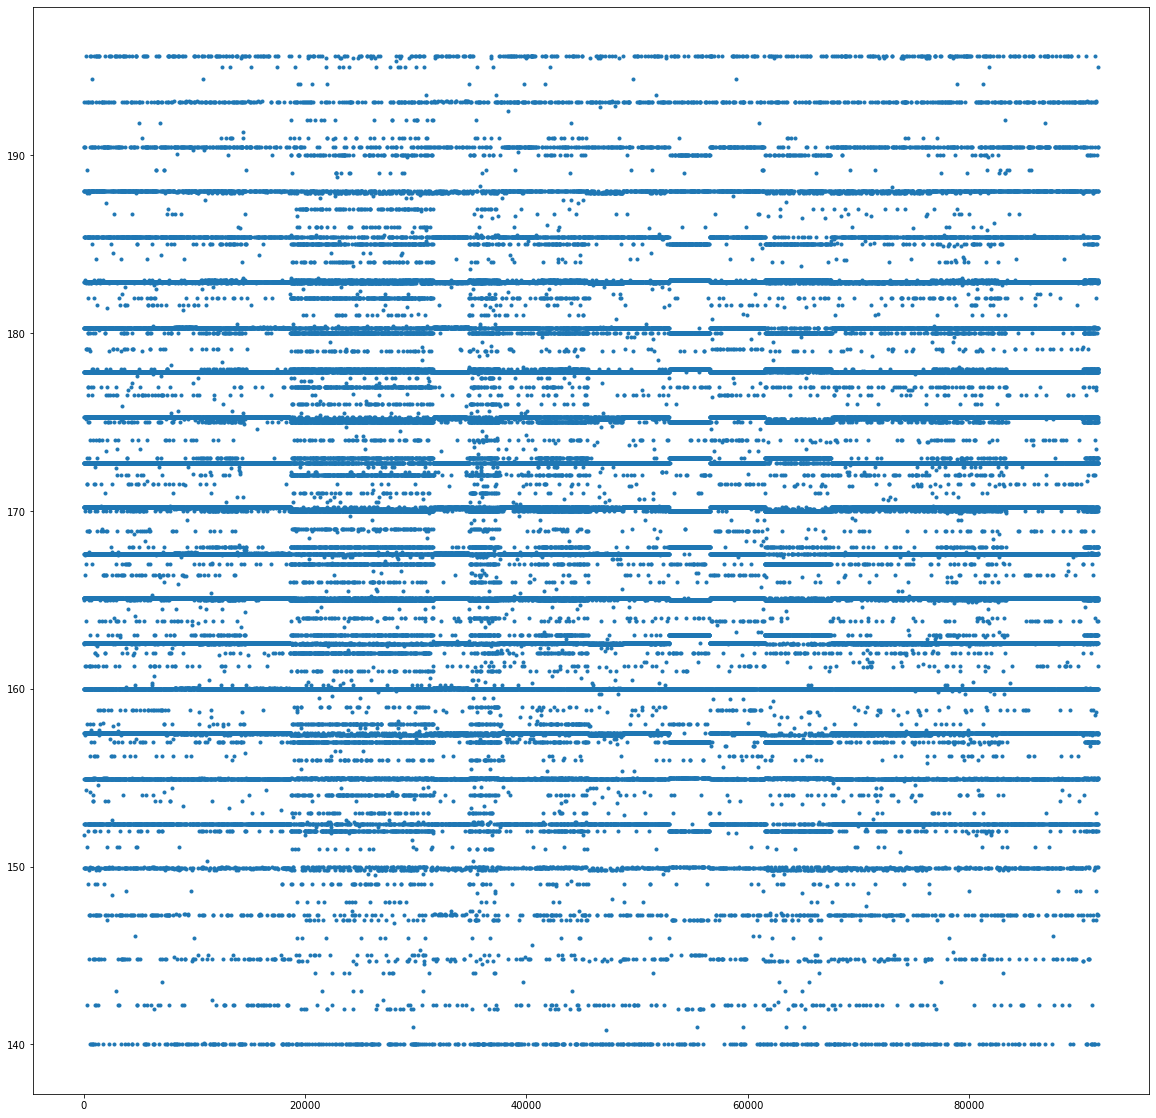

In [0]:
plt.figure(figsize=(20,20))
plt.plot(df_thresh['height'],'.')
plt.show()

**PRE ICU LOS DAYS**: The length of stay of the patient between hospital admission and unit admission

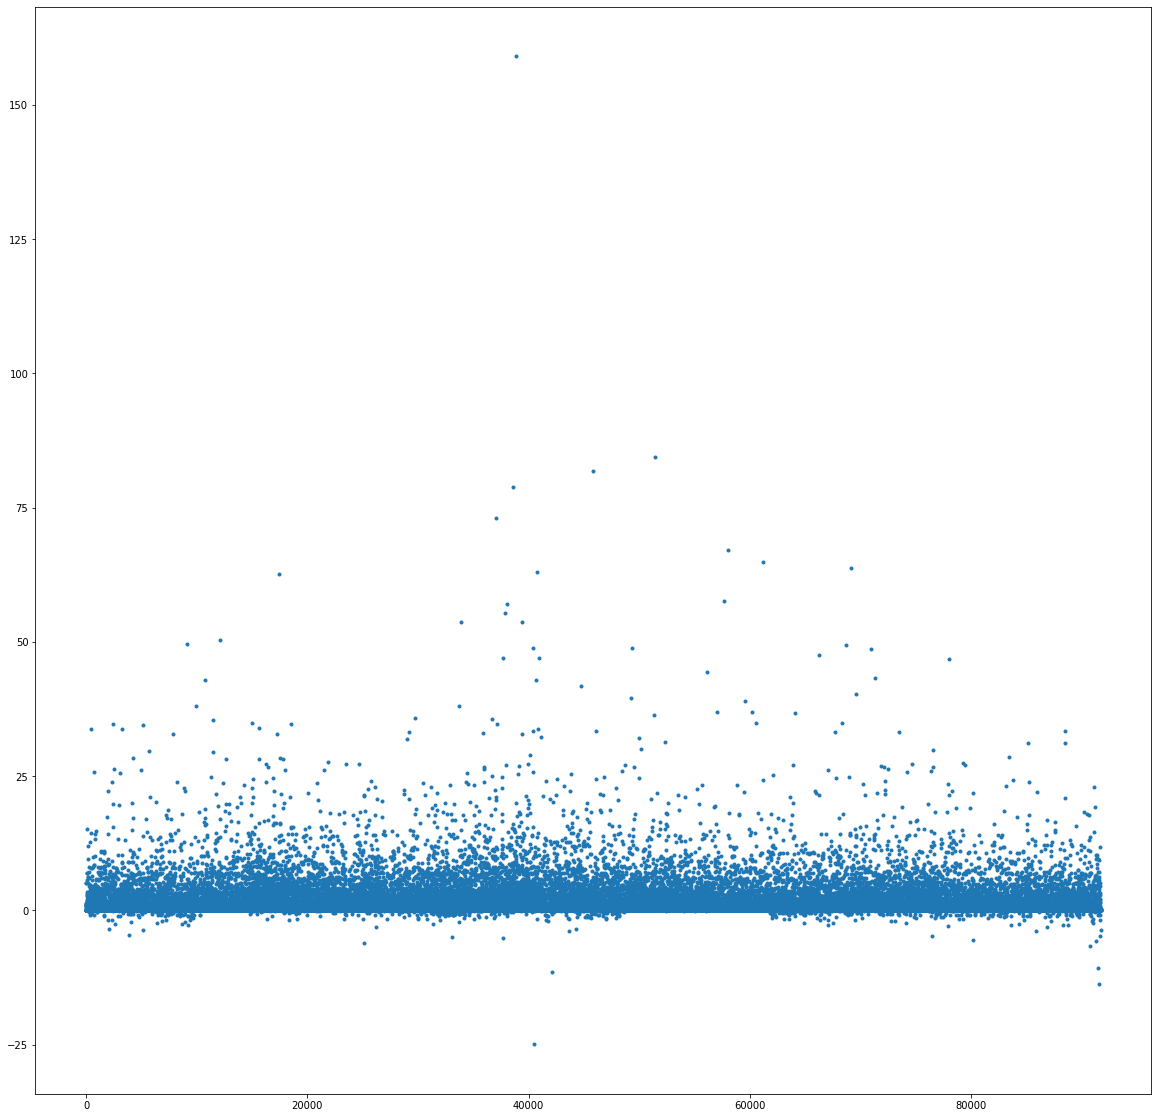

In [0]:
plt.figure(figsize=(20,20))
plt.plot(data['pre_icu_los_days'],'.')
plt.show()

In [0]:
estancia_neg=data[data.pre_icu_los_days<0]
estancia_neg

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
294,95653,64810,83,0,74.0,44.370252,0,Caucasian,F,149.90,Emergency Department,Accident & Emergency,95,admit,Med-Surg ICU,-0.132639,0,99.70,NaN,110.0,104.01,0,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,193.0,65.0,NaN,0.0,108.0,NaN,NaN,NaN,NaN,...,3.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Cardiovascular,Cardiovascular
310,105080,29703,118,0,73.0,NaN,0,Caucasian,M,167.60,Direct Admit,Accident & Emergency,114,admit,CCU-CTICU,-0.215278,0,NaN,NaN,110.0,104.01,0,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,94.0,NaN,0.0,67.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cardiovascular,Cardiovascular
397,108162,79018,118,0,NaN,42.364193,0,Caucasian,M,167.60,Floor,Floor,114,admit,CCU-CTICU,-0.786806,0,119.00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,124423,64940,77,0,NaN,27.887976,0,African American,M,175.30,Direct Admit,Floor,113,readmit,Med-Surg ICU,-0.612500,0,85.70,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.3,NaN,NaN,112.0,112.0,3.5,3.5,140.0,140.0,8.1,8.1,39.0,39.0,7.43,7.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,17884,6999,77,0,NaN,33.448627,0,Caucasian,M,176.50,NaN,Operating Room / Recovery,113,admit,Med-Surg ICU,-0.844444,0,104.20,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91597,22339,90132,183,1,NaN,30.470522,0,Caucasian,F,168.00,Floor,Floor,909,admit,Med-Surg ICU,-13.775000,0,86.00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91625,49553,18923,6,0,NaN,21.947625,0,Caucasian,F,157.48,Emergency Department,Accident & E

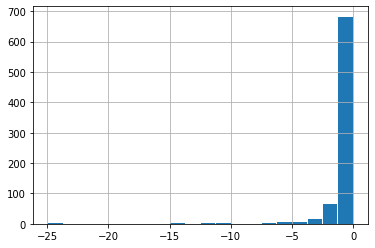

In [0]:
estancia_neg['pre_icu_los_days'].hist(bins=20,rwidth=0.95)

In [0]:
estancia_neg.pre_icu_los_days

294      -0.132639
310      -0.215278
397      -0.786806
576      -0.612500
707      -0.844444
           ...    
91597   -13.775000
91625    -0.868750
91689    -1.735417
91693    -4.731250
91707    -3.593056
Name: pre_icu_los_days, Length: 778, dtype: float64

Son muchos valores negativos continuos asi que hago el valor absoluto

In [0]:
indx=0
for i in data.pre_icu_los_days:
    if i<0:
        df_thresh.pre_icu_los_days[indx]=abs(i)
    indx=indx+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



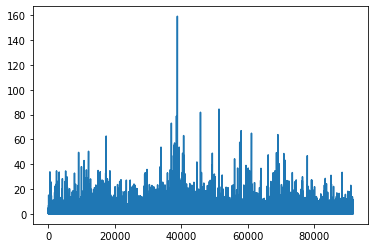

In [0]:
plt.figure()
plt.plot(df_thresh.pre_icu_los_days)
plt.show()

Valor muy alto

In [0]:
estancia_larga=data[data.pre_icu_los_days>60]
estancia_larga

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
17409,126674,117628,98,0,60.0,34.833210,0,African American,M,182.88,Emergency Department,Accident & Emergency,267,admit,Med-Surg ICU,62.647917,0,116.5,NaN,109.0,108.01,0,1.0,NaN,NaN,NaN,NaN,4.0,4.0,0.0,4.0,75.0,123.0,NaN,0.0,57.0,NaN,NaN,NaN,NaN,...,1.20,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,0.09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
37044,97791,52521,70,0,55.0,32.543618,0,Caucasian,F,165.00,Floor,Floor,434,admit,MICU,73.022917,0,88.6,NaN,303.0,211.09,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,114.0,NaN,0.0,62.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.50,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
38582,25080,31101,199,0,46.0,26.147337,1,African American,M,180.30,NaN,Operating Room / Recovery,471,admit,CTICU,78.762500,0,85.0,3.4,NaN,0.11,0,0.0,0.7,22.0,1.66,NaN,NaN,NaN,NaN,NaN,187.0,100.0,35.6,0.0,124.0,NaN,NaN,NaN,NaN,...,1.48,1.46,3.41,3.41,114.0,114.0,4.8,4.7,135.0,134.0,NaN,NaN,36.0,36.000,7.380,7.38000,265.0,265.0,530.000000,530.000000,36.0,36.0,7.38,7.380,265.0,265.0,530.000000,530.000000,-1.00,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
38854,40521,8387,199,0,44.0,30.207865,1,African American,M,180.30,Operating Room,Operating Room / Recovery,468,admit,CTICU,159.090972,0,98.2,2.8,NaN,0.11,0,0.0,1.9,24.0,1.94,NaN,2.0,5.0,0.0,3.0,207.0,126.0,18.7,0.0,52.0,NaN,NaN,NaN,NaN,...,1.52,1.46,9.99,8.50,95.0,95.0,4.5,4.0,138.0,135.0,NaN,NaN,38.0,34.000,7.450,7.31000,253.0,89.0,260.000000,222.500000,38.0,37.0,7.34,7.330,253.0,226.0,226.000000,226.000000,-1.00,-1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
40741,125035,78785,54,0,78.0,23.898521,0,Caucasian,F,149.90,Floor,Floor,474,admit,SICU,63.044444,0,53.7,2.7,114.0,102.01,0,0.0,0.2,63.0,0.82,NaN,1.0,1.0,0.0,1.0,404.0,63.0,30.0,0.0,55.0,NaN,NaN,NaN,NaN,...,1.08,1.02,NaN,NaN,302.0,302.0,4.7,4.7,134.0,134.0,16.30,16.30,55.0,44.000,7.350,7.28000,321.0,123.0,535.000000,307.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,0.81,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
45816,26126,86888,21,0,74.0,26.952832,0,Hispanic,M,152.40,Floor,Floor,508,admit,Med-Surg ICU,81.802778,0,62.6,3.1,120.0,407.01,0,0.0,NaN,68.0,6.80,0.24,4.0,6.0,0.0,5.0,114.0,48.0,25.8,0.0,47.0,21.0,21.0,119.0,6.96054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21.000,7.590,7.55786,119.0,119.0,495.833333,495.833333,21.0,21.0,7.57,7.563,119.0,119.0,495.833333,495.833333,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
51400,103478,31953,26,1,88.0,23.282371,0,Caucasian,M,182.80,Floor,Floor,556,admit,Med-Surg ICU,84.367361,0,77.8,Na

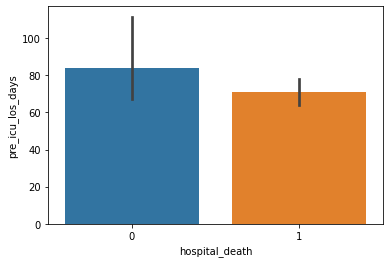

In [0]:
sns.barplot(x="hospital_death", y="pre_icu_los_days" , data=estancia_larga);

No hay relación con la muerte

**D1 RESPRATE MIN**: The patient's lowest respiratory rate during the first 24 hours of their unit stay	

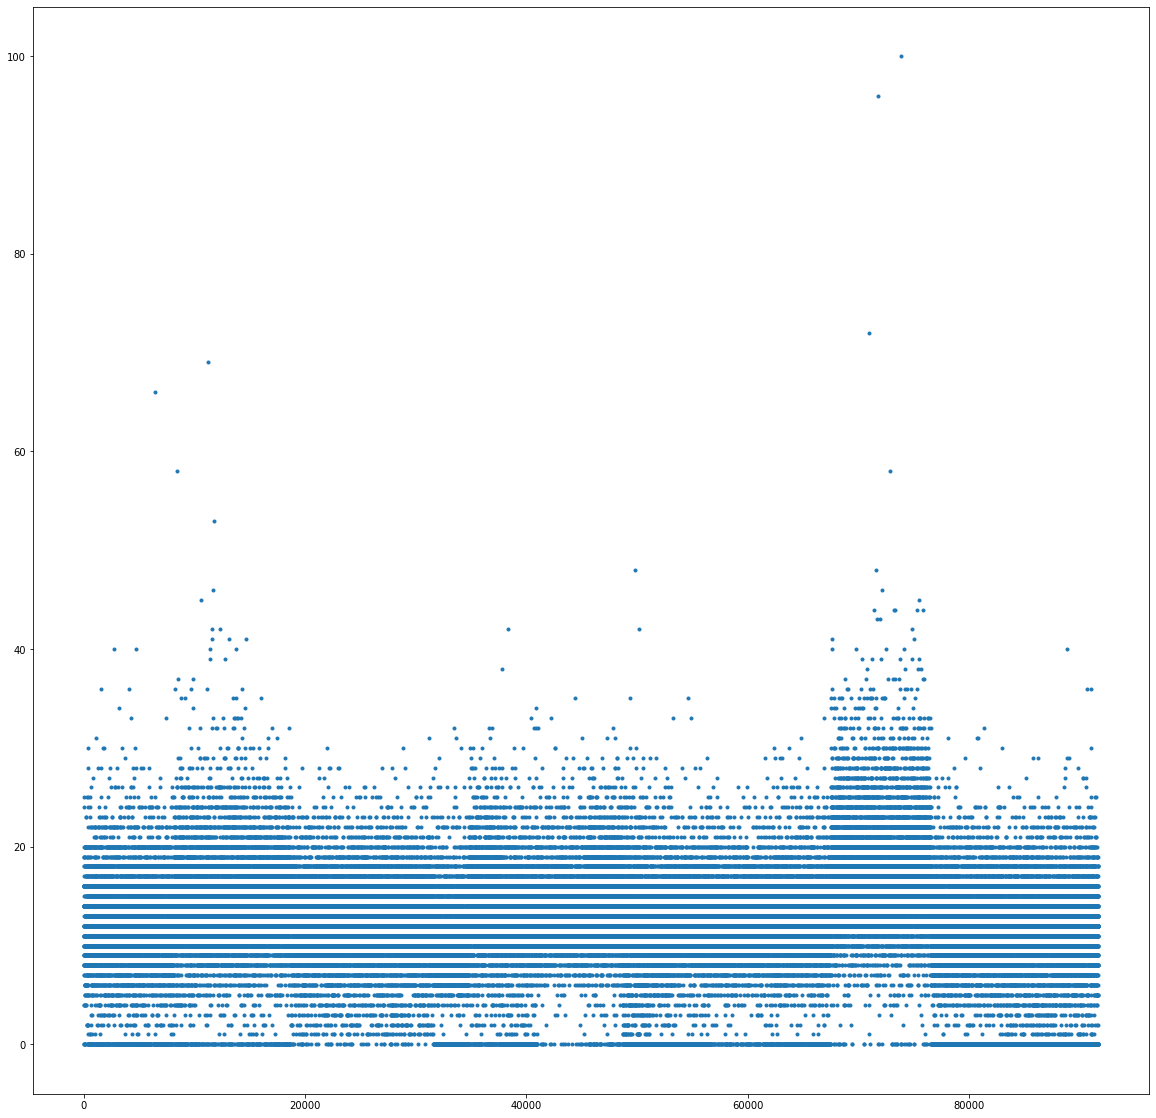

In [0]:
plt.figure(figsize=(20,20))
plt.plot(data['d1_resprate_min'],'.')
plt.show()

Valores muy altos

In [0]:
data[data.d1_resprate_min>65]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
6434,77042,35568,118,0,68.0,NaN,1,Caucasian,F,157.5,Emergency Department,Operating Room / Recovery,85,admit,SICU,3.559722,0,NaN,NaN,202.0,1203.02,1,0.0,NaN,10.0,0.72,NaN,4.0,6.0,0.0,5.0,117.0,94.0,24.7,0.0,125.0,NaN,NaN,NaN,NaN,...,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
11186,90610,43818,57,0,83.0,28.671875,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,176,admit,Med-Surg ICU,0.159722,0,73.4,NaN,109.0,108.01,0,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,104.0,NaN,0.0,151.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
70967,90329,84484,185,0,58.0,29.745809,1,Caucasian,M,172.0,NaN,Operating Room / Recovery,711,admit,CCU-CTICU,3.825000,0,88.0,NaN,308.0,1207.01,1,0.0,NaN,12.0,0.80,0.3,4.0,6.0,0.0,5.0,91.0,105.0,28.9,1.0,55.0,41.0,41.0,96.0,7.39,...,1.3,1.1,NaN,NaN,137.0,137.0,4.4,4.4,141.0,141.0,14.7,14.7,45.0,41.0,7.39,7.38,494.0,96.0,447.5,320.0,45.0,42.0,7.39,7.38,494.0,179.0,447.5,447.5,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
71776,30957,94046,139,0,68.0,28.402367,0,Caucasian,F,162.5,NaN,Accident & Emergency,684,admit,Cardiac ICU,0.049306,0,75.0,NaN,302.0,109.10,0,0.0,NaN,16.9,0.90,NaN,4.0,6.0,0.0,5.0,164.0,102.0,41.1,0.0,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
73863,4420,126825,185,0,NaN,23.090441,1,Caucasian,F,147.3,Emergency Department,Operating Room / Recovery,711,admit,CCU-CTICU,1.194444,0,50.1,NaN,308.0,1902.03,1,0.0,NaN,18.0,1.30,NaN,4.0,6.0,0.0,5.0,181.0,59.0,23.6,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Musculoskeletal/Skin,Undefined diagnoses


In [0]:
indx=0
for i in data.d1_resprate_min:
    if i>65:
        df_thresh.d1_resprate_min[indx]=65
    indx=indx+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
max(df_thresh.d1_resprate_min)

65.0

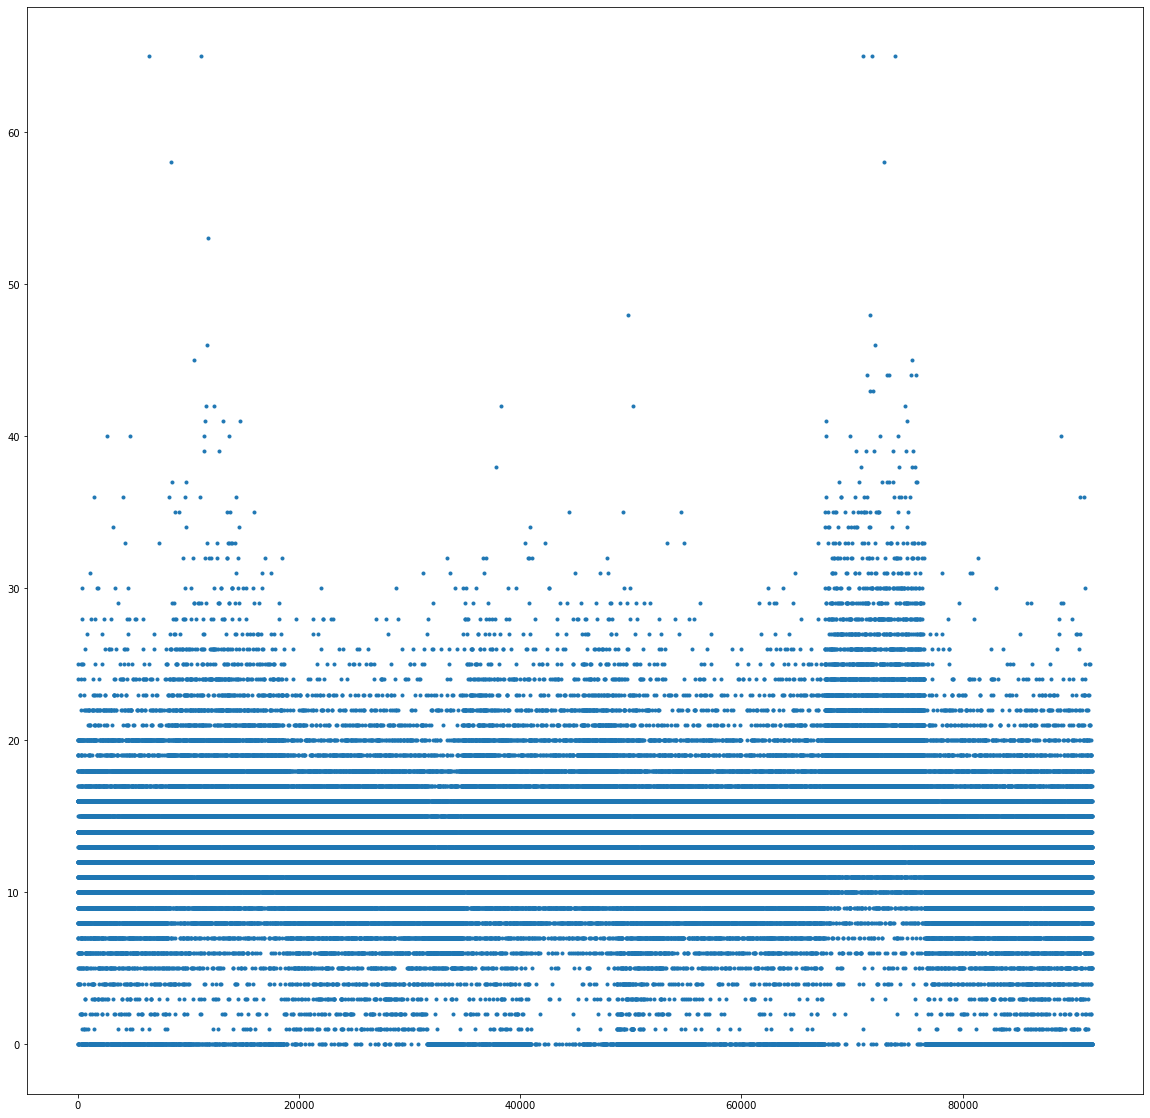

In [0]:
plt.figure(figsize=(20,20))
plt.plot(df_thresh['d1_resprate_min'],'.')
plt.show()

DE LA 37 A LA 74
Index(['d1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'h1_temp_max', 'h1_temp_min', 'd1_bun_max', 'd1_bun_min',
       'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max',
       'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max'],
      dtype='object')

En este intervalo las variables no presentan outliers, siguen una distribución normal o exponencial. No se detecta la presencia de outliers.

DE LA 75 A LA 110
Index(['d1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min',
       'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'hospital_id', 'hospital_death',
       'elective_surgery', 'ethnicity', 'gender', 'hospital_admit_source',
       'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type',
       'readmission_status', 'apache_post_operative', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

**apache_4a_hospital_death_prob**: The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis

(-1.0, 0.99)

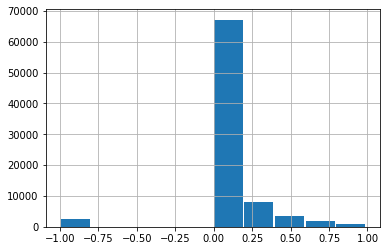

In [0]:
data['apache_4a_hospital_death_prob'].hist(rwidth=0.95)
min(data['apache_4a_hospital_death_prob']),max(data['apache_4a_hospital_death_prob'])

**Importante: quitar errores --> valores negativos**

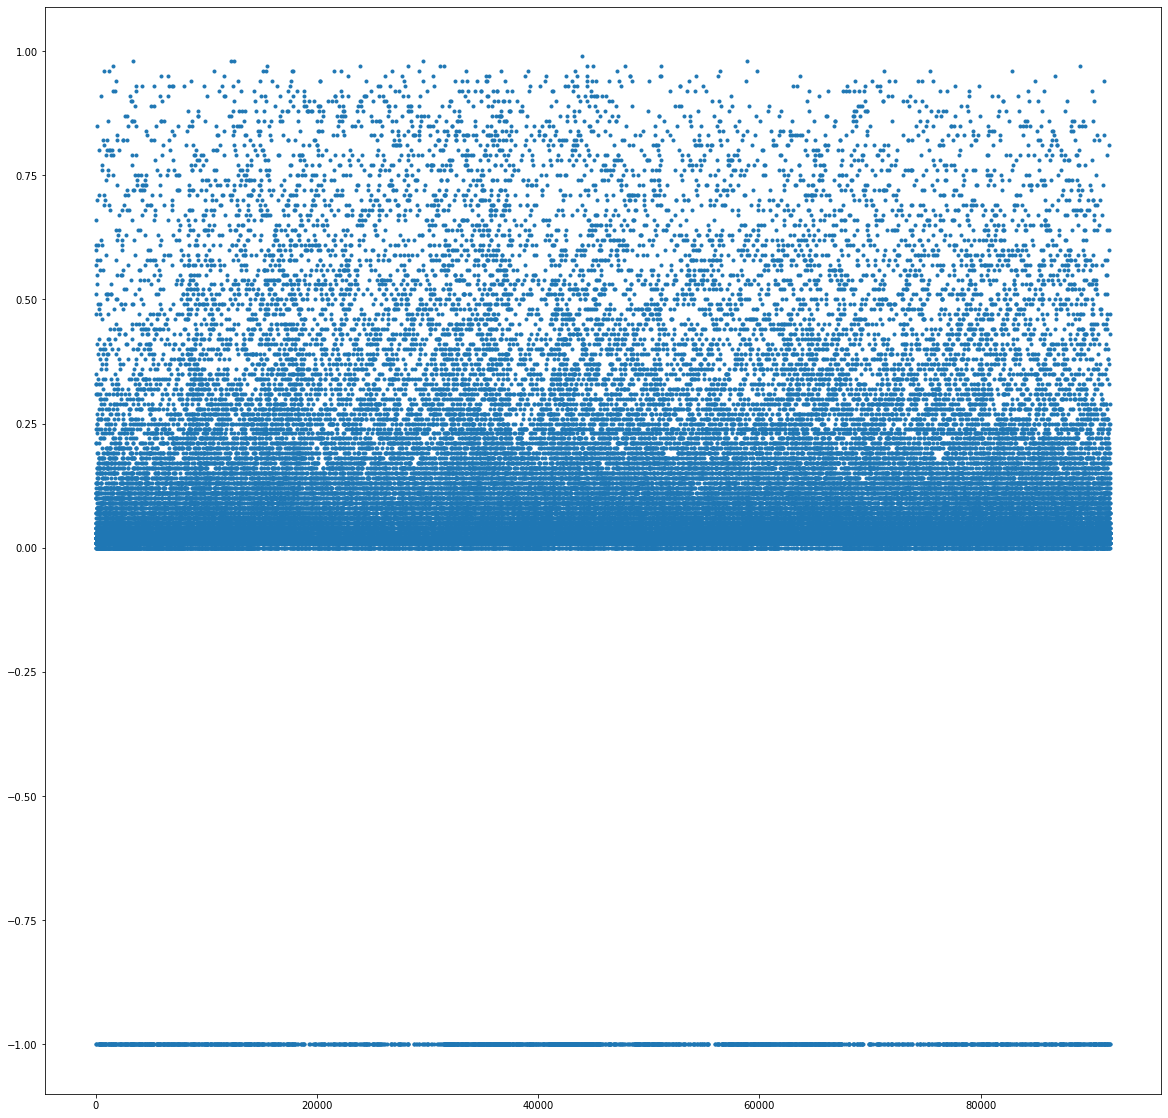

In [0]:
plt.figure(figsize=(20,20))
plt.plot(data['apache_4a_hospital_death_prob'],'.')
plt.show()

https://www.kaggle.com/c/widsdatathon2020/discussion/127698
Los valores negativos (imposibles: porque no existen probs negativas) pueden indiar que son missing values.

In [0]:
df_thresh['apache_4a_hospital_death_prob'].isna().sum()

7947

In [0]:
count = 0
for i in df_thresh['apache_4a_hospital_death_prob']:
  if i == -1:
    count += 1
print(count)


2371


In [0]:
df_thresh['apache_4a_hospital_death_prob'] = df_thresh['apache_4a_hospital_death_prob'].replace(-1, np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.0, 0.99)

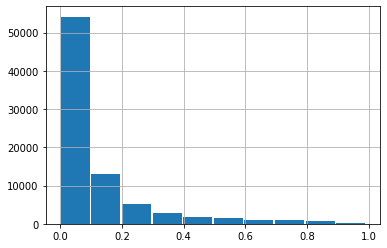

In [0]:
df_thresh['apache_4a_hospital_death_prob'].hist(rwidth=0.95)
min(df_thresh['apache_4a_hospital_death_prob']),max(df_thresh['apache_4a_hospital_death_prob'])

**apache_4a_icu_death_prob**: The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis

(-1.0, 0.97)

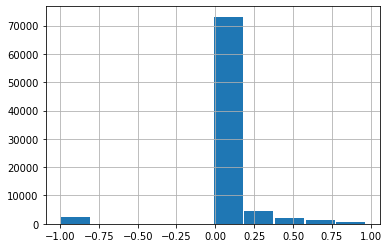

In [0]:
data['apache_4a_icu_death_prob'].hist(rwidth=0.95)
min(data['apache_4a_icu_death_prob']),max(data['apache_4a_icu_death_prob'])


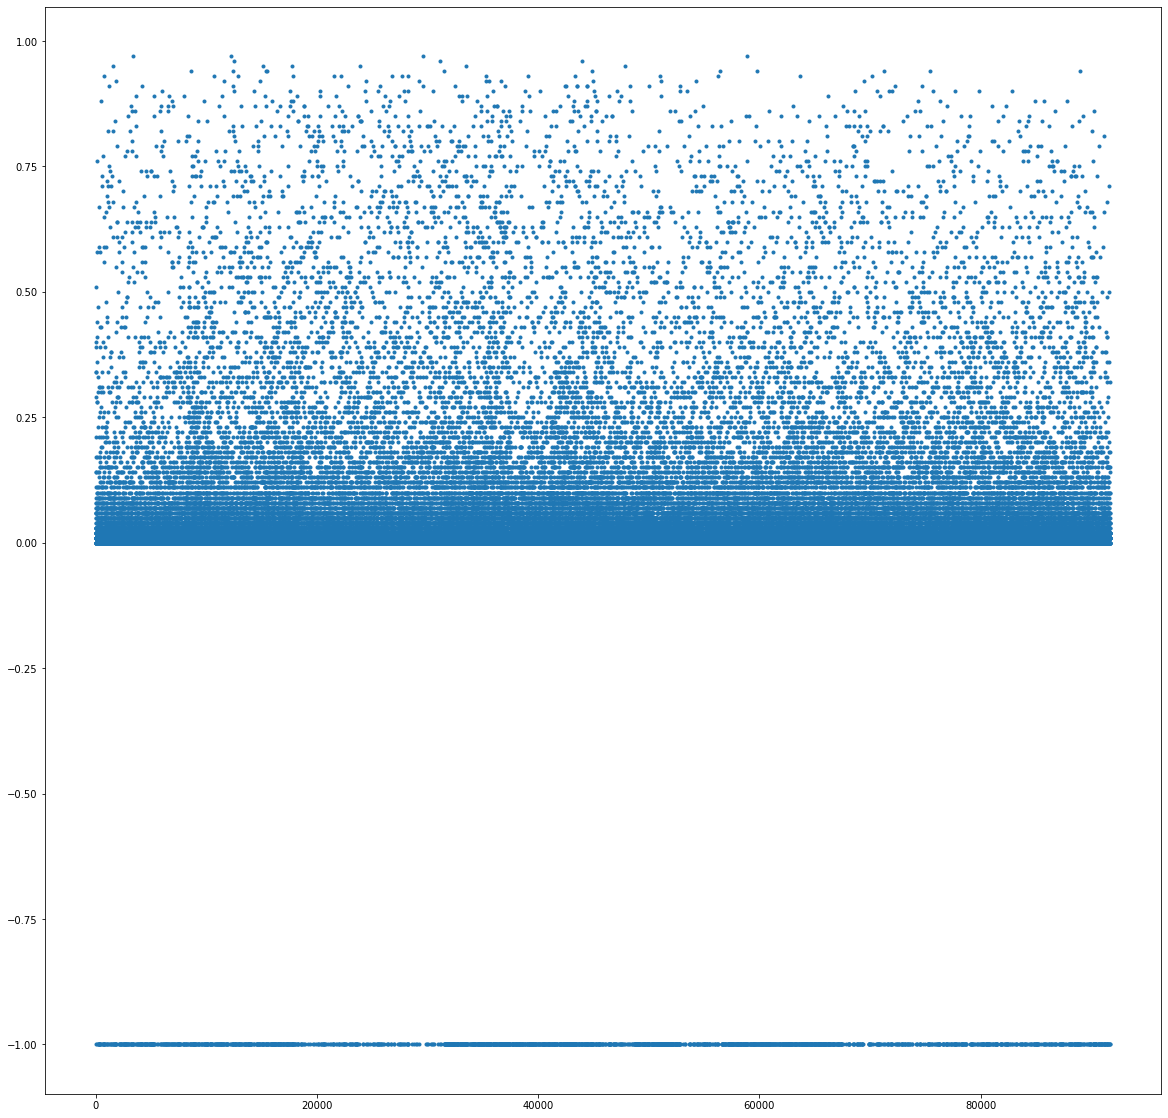

In [0]:
plt.figure(figsize=(20,20))
plt.plot(data['apache_4a_icu_death_prob'],'.')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.0, 0.97)

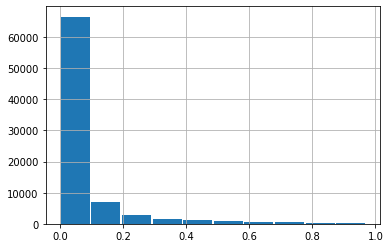

In [0]:
df_thresh['apache_4a_icu_death_prob'] = df_thresh['apache_4a_icu_death_prob'].replace(-1, np.nan)

df_thresh['apache_4a_icu_death_prob'].hist(rwidth=0.95)
min(df_thresh['apache_4a_icu_death_prob']),max(df_thresh['apache_4a_icu_death_prob'])

#Data type

In [0]:
col_name = list(df_thresh.columns)
col_type = list(df_thresh.dtypes)
print(list(zip(col_name, col_type)))

[('hospital_death', dtype('int64')), ('age', dtype('float64')), ('bmi', dtype('float64')), ('elective_surgery', dtype('int64')), ('ethnicity', dtype('O')), ('gender', dtype('O')), ('height', dtype('float64')), ('hospital_admit_source', dtype('O')), ('icu_admit_source', dtype('O')), ('icu_stay_type', dtype('O')), ('icu_type', dtype('O')), ('pre_icu_los_days', dtype('float64')), ('readmission_status', dtype('int64')), ('weight', dtype('float64')), ('apache_2_diagnosis', dtype('float64')), ('apache_3j_diagnosis', dtype('float64')), ('apache_post_operative', dtype('int64')), ('arf_apache', dtype('float64')), ('bun_apache', dtype('float64')), ('creatinine_apache', dtype('float64')), ('gcs_eyes_apache', dtype('float64')), ('gcs_motor_apache', dtype('float64')), ('gcs_unable_apache', dtype('float64')), ('gcs_verbal_apache', dtype('float64')), ('glucose_apache', dtype('float64')), ('heart_rate_apache', dtype('float64')), ('hematocrit_apache', dtype('float64')), ('intubated_apache', dtype('floa

**Categorical data**

In [0]:
categorical_cols = df_thresh.select_dtypes(exclude=['float', 'int64']).columns
categorical_cols

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [0]:
type(df_thresh['hospital_death'][0])

numpy.int64

In [0]:
categorical_df = df_thresh[categorical_cols]
categorical_df

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_df = imp.fit_transform(categorical_df)

In [0]:
categorical_df = pd.DataFrame(categorical_df)
categorical_df.columns = categorical_cols
categorical_df.isna().sum().sum()

0

**Numerical data**

In [0]:
numerical_cols = df_thresh.select_dtypes(include=['float', 'int64']).columns
numerical_cols

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'readmission_status', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache',
       'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1

In [0]:
#numerical_df = df_thresh[np.array(numerical_cols)]
numerical_df = df_thresh[numerical_cols]
numerical_df

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,...,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.10,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,...,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.70,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,...,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.30,12.70,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,25.0,31.950000,0,172.7,0.000694,0,95.3,122.0,703.03,0,0.0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,0.0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,...,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,81.0,22.640000,1,165.1,0.000694,0,61.7,203.0,1206.03,1,0.0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,4.0,NaN,34.8,1.0,8.00,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,...,100.0,99.0,136.0,106.0,NaN,NaN,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,185.0,88.0,NaN,NaN,11.6,8.9,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.00,8.00,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,19.0,NaN,0,188.0,0.073611,0,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,16.0,NaN,36.7,0.0,NaN,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,...,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,177.8,0.298611,0,72.9,113.0,501.06,0,0.0,NaN,NaN,4.0,6.0,0.0,5.0,381.0,115.0,NaN,0.0,48.0,9.0,NaN,36.6,1.0,NaN,104.0,44.0,104.0,44.0,115.0,70.0,109.0,48.0,109.0,48.0,27.0,9.0,...,98.0,97.0,94.0,87.0,94.0,87.0,38.2,38.2,27.0,27.0,8.2,8.2,1.10,1.10,400.0,187.0,28.0,28.0,13.2,13.2,39.0,39.0,92.0,92.0,4.2,4.2,140.0,140.0,5.68,5.68,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,0,56.0,47.179671,0,183.0,0.120139,0,158.0,113.0,501.05,0,0.0,34.0,2.30,4.0,6.0,0.0,5.0,177.0,100.0,

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
numerical_df = imp.fit_transform(numerical_df)

In [0]:
numerical_df = pd.DataFrame(numerical_df)
numerical_df.columns = numerical_cols
numerical_df.isna().sum().sum()

0

------

# One Hot Encoding

In [0]:
print('nº of variables : ', df_thresh.shape[1],'\nnº of patients: ', df_thresh.shape[0])

nº of variables :  108 
nº of patients:  91713


In [0]:
categorical_df.head(10)

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
5,Caucasian,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic
6,Caucasian,F,Operating Room,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory
7,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Sepsis,Cardiovascular
8,Caucasian,M,Other Hospital,Other Hospital,admit,CCU-CTICU,Cardiovascular,Cardiovascular
9,Caucasian,M,Direct Admit,Accident & Emergency,admit,CCU-CTICU,Cardiovascular,Cardiovascular


In [0]:
ohe = []
for i in categorical_cols:
  ohe.append(pd.get_dummies(categorical_df[i], prefix = i))

In [0]:
len(ohe),len(numerical_df.columns),len(categorical_cols)

(8, 100, 8)

In [0]:
ohe[1]

,gender_F,gender_M
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
91708,0,1
91709,1,0
91710,0,1
91711,1,0


In [0]:
for i in ohe:
  clean_data = pd.concat([numerical_df, i], axis=1)

In [0]:
clean_data.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'readmission_status', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis',
       ...
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object', length=110)

In [0]:
len(clean_data.columns)

110

-----

## Save clean data

In [0]:
clean_data.to_csv('/content/drive/My Drive/PROCESADO MASIVO/pre_ICU_Mortality_Prediction.csv')

# Normalización




In [0]:
x = clean_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_data = pd.DataFrame(x_scaled)

In [0]:
norm_data.columns=clean_data.columns

In [0]:
norm_data.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,...,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.0,0.712329,0.148859,0.0,0.724951,0.003405,0.0,0.239484,0.057971,0.228074,0.0,0.0,0.219512,0.203125,0.666667,1.0,0.0,0.75,0.230481,0.594595,0.318182,0.0,0.00000,0.571429,0.414634,0.947368,0.0,0.293987,0.184874,0.311688,0.184874,0.311688,0.512605,0.411429,0.233871,0.266667,0.239669,0.266667,0.256410,0.153846,...,0.500000,0.395833,0.201486,0.200251,0.176580,0.298039,0.250000,0.25000,0.201923,0.315789,0.225080,0.333333,0.369176,0.397940,0.285714,0.294118,0.371429,0.472222,0.287433,0.330017,0.101010,0.051546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.835616,0.237400,0.0,0.359777,0.005832,0.0,0.214383,0.033816,0.092229,0.0,0.0,0.040650,0.023897,0.000000,0.4,0.0,0.00,0.189387,0.608108,0.588068,0.0,0.03750,0.517857,0.682927,0.394737,1.0,0.262806,0.411765,0.233766,0.411765,0.233766,0.504202,0.411429,0.483871,0.177778,0.495868,0.177778,0.230769,0.184615,...,0.521739,0.520833,0.034355,0.026977,0.133829,0.372549,0.535714,0.59375,0.432692,0.508772,0.530547,0.589971,0.949821,0.869271,0.333333,0.411765,0.628571,0.777778,0.492424,0.295015,0.474747,0.298969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.123288,0.322920,0.0,0.588235,0.000004,0.0,0.384668,0.101449,0.319404,0.0,0.0,0.121951,0.062500,0.666667,1.0,0.0,1.00,0.167947,0.486486,0.482955,0.0,0.17500,0.589286,0.512195,0.605263,0.0,0.211581,0.352941,0.454545,0.352941,0.454545,0.319328,0.388571,0.338710,0.511111,0.347107,0.511111,0.089744,0.123077,...,0.478261,0.562500,0.061281,0.067442,0.143123,0.290196,0.428571,0.50000,0.442308,0.491228,0.453376,0.504425,0.302867,0.312581,0.333333,0.441176,0.457143,0.583333,0.218360,0.230012,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.890411,0.147160,1.0,0.451520,0.000004,0.0,0.156716,0.492754,0.547932,1.0,0.0,0.121951,0.062500,1.000000,1.0,0.0,1.00,0.260854,0.567568,0.275568,1.0,0.12500,0.000000,0.512195,0.355263,1.0,0.158129,0.016807,0.376623,0.016807,0.376623,0.487395,0.525714,0.193548,0.688889,0.198347,0.688889,0.115385,0.107692,...,0.478261,0.562500,0.061281,0.067442,0.208178,0.215686,0.428571,0.50000,0.461538,0.315789,0.437299,0.289086,0.306452,0.045370,0.523810,0.323529,0.457143,0.583333,0.173797,0.177509,0.040404,0.030928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.041096,0.241830,0.0,0.863465,0.000463,0.0,0.282904,0.086957,0.273053,0.0,0.0,0.121951,0.062500,1.000000,1.0,0.0,1.00,0.167947,0.202703,0.482955,0.0,0.39375,0.214286,0.512195,0.605263,0.0,0.211581,0.44

In [0]:
norm_data.describe()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,...,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.0,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,0.636076,0.269655,0.183736,0.533594,0.005322,0.0,0.307448,0.402187,0.252797,0.201106,0.027761,0.165787,0.099010,0.825379,0.896431,0.009421,0.753903,0.210896,0.471277,0.478254,0.150044,0.298676,0.390008,0.511541,0.568198,0.323182,0.240920,0.357037,0.482611,0.357918,0.483634,0.378129,0.401827,0.360040,0.476331,0.368171,0.476960,0.190650,0.197632,...,0.474324,0.558851,0.101622,0.105907,0.186019,0.317308,0.439510,0.504452,0.446328,0.490305,0.454274,0.498034,0.319853,0.328053,0.344334,0.450305,0.460294,0.576473,0.246529,0.255993,0.111863,0.068743,0.000850,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,0.020477,0.441355,0.098416,0.006956,0.083412,0.129709,0.026823,0.126580,0.041892,0.003773,0.041085
std,0.280811,0.224570,0.153373,0.387271,0.192040,0.015614,0.0,0.167204,0.413942,0.209339,0.400829,0.164287,0.151084,0.126367,0.314959,0.255436,0.096603,0.387635,0.152967,0.207603,0.172837,0.357117,0.261629,0.267972,0.114970,0.107212,0.467694,0.135327,0.166226,0.172800,0.165394,0.172282,0.184875,0.097728,0.167611,0.174010,0.169720,0.173052,0.136937,0.077586,...,0.148086,0.151177,0.132704,0.131204,0.156344,0.145432,0.142802,0.142605,0.194195,0.192625,0.187425,0.188807,0.148556,0.151305,0.150409,0.161350,0.129717,0.128976,0.140607,0.138089,0.159784,0.131181,0.029151,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,0.141626,0.496552,0.297878,0.083115,0.276506,0.335985,0.161566,0.332503,0.200342,0.061306,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [0]:
norm_data.to_csv('/content/drive/My Drive/PROCESADO MASIVO/pre_ICU_Mortality_Prediction_norm.csv')